In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
data=pd.read_csv("heart.csv")

In [145]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age : Age of the patient

sex : Sex of the patient

cp : Chest Pain

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl

fbs : fasting blood sugar

restecg : resting electrocardiographic results

thalachh : Maximum heart rate

exang: exercise induced angina

old peak : Previous peak

slp : Slope

caa: number of major vessels

output : 0= less chance of heart attack 1= more chance of heart attack

In [146]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [147]:
import dtale
dtale.show(data)

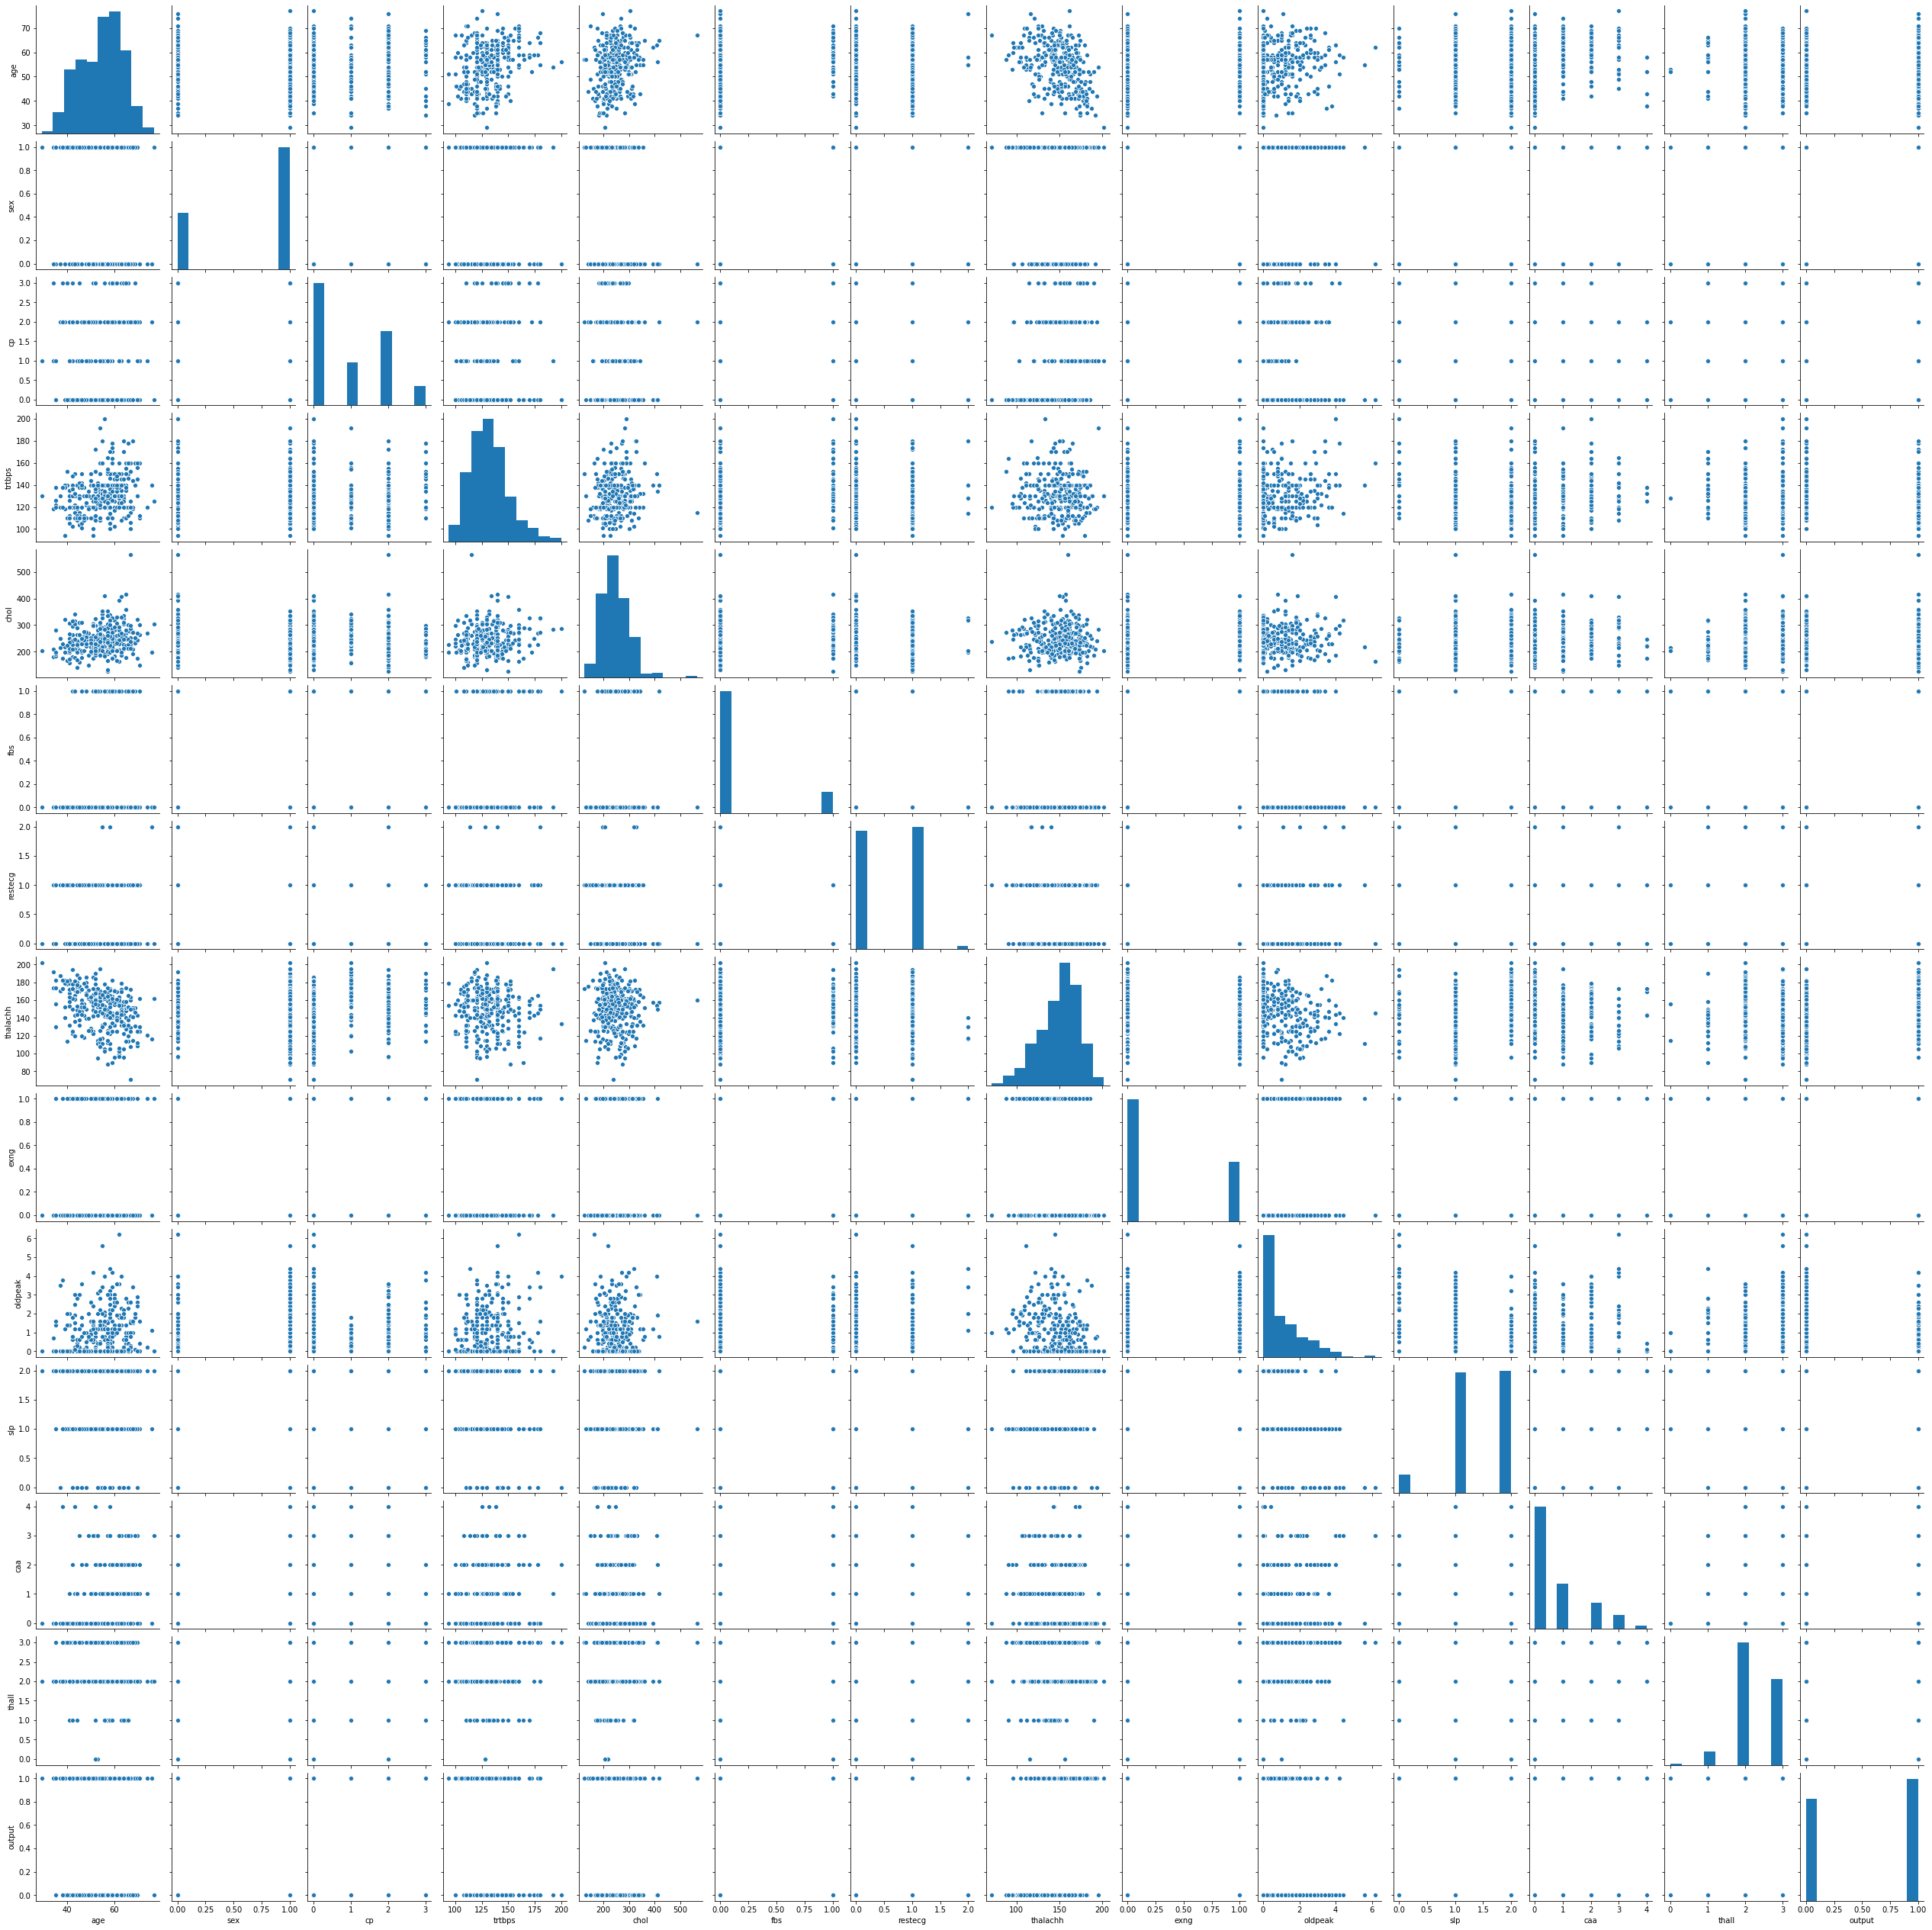

In [148]:
sns.pairplot(data)

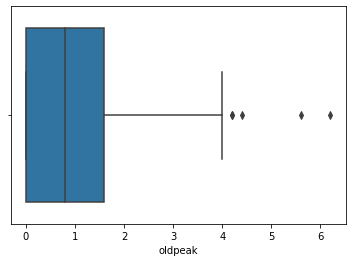

In [149]:
sns.boxplot(data["oldpeak"])

In [150]:
cor=data.corr()

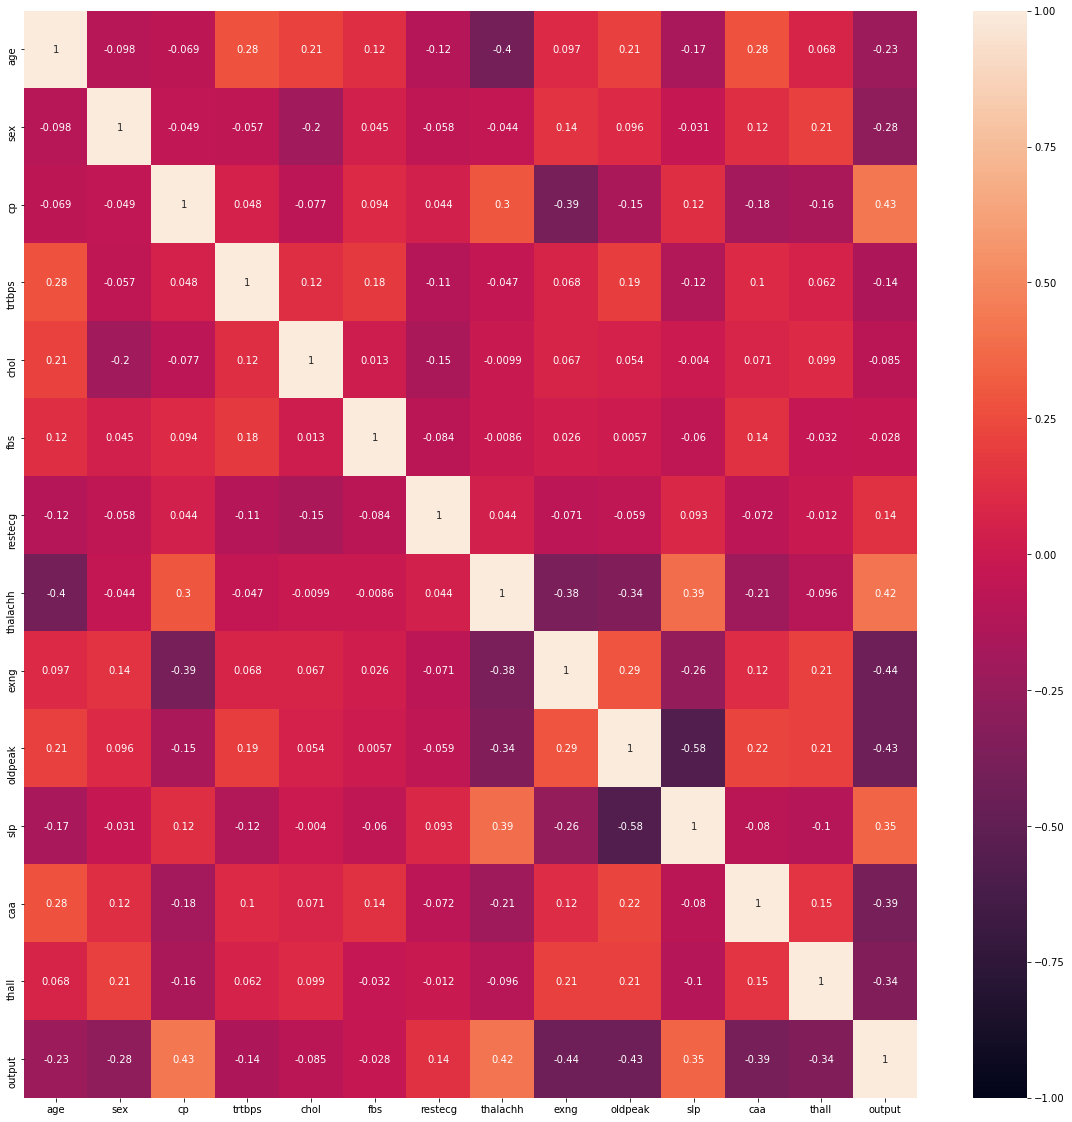

In [151]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,vmin=-1,vmax=1,annot=True)

In [152]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

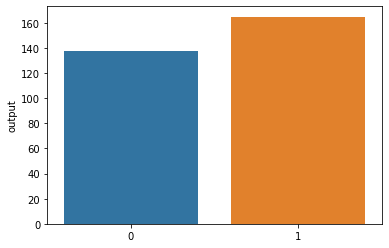

In [153]:
sns.barplot(data["output"].value_counts().index,data["output"].value_counts())

In [154]:
cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

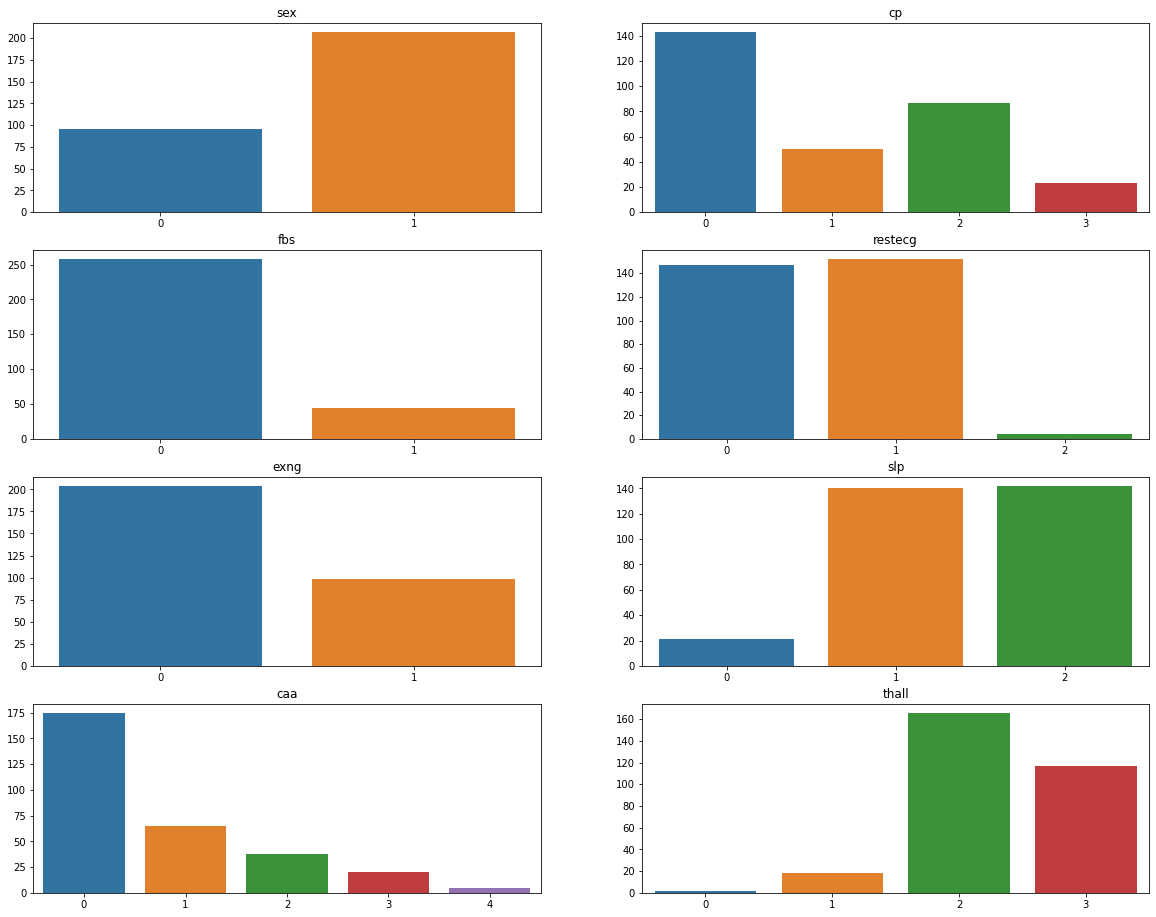

In [155]:
fig,  ax = plt.subplots(nrows=4, ncols=2, figsize=(20,16))
t = 0

for i in range(4):
    for j in range(2):
        cat_bar = [data[col].value_counts() for col in cols]
        axes = ax[i][j]
        sns.barplot(x=cat_bar[t].index, y=cat_bar[t].values, ax=axes)
        axes.set_title(cols[t])
        t += 1
plt.show()

In [156]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [157]:
Y.shape

(303,)

In [158]:
X.shape

(303, 13)

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.18733254, -1.37147817, -0.96052267,  0.15197298,  3.06663801,
        -0.43159531, -1.01054031, -0.01372906,  1.50674161,  0.7957577 ,
        -0.63678177,  1.30209953,  1.19898626],
       [ 0.40633967,  0.72914029,  0.97653138, -1.06472495, -0.33003859,
        -0.43159531, -1.01054031,  0.6507574 , -0.6636838 ,  1.31881798,
        -0.63678177,  0.30492204,  1.19898626],
       [ 1.06336104,  0.72914029,  0.97653138, -0.34576709,  1.16905332,
        -0.43159531,  0.90001247, -0.85541191,  1.50674161,  0.70858098,
        -0.63678177, -0.69225545,  1.19898626],
       [-0.79819952,  0.72914029, -0.96052267, -1.06472495, -0.82341062,
        -0.43159531,  0.90001247, -0.32382274, -0.6636838 , -0.77342317,
         0.96843894, -0.69225545, -0.43109618],
       [-0.46968884,  0.72914029, -0.96052267,  1.03684419, -0.08335258,
        -0.43159531, -1.01054031, -0.9883092 , -0.6636838 ,  1.4059947 ,
        -0.63678177, -0.69225545,  1.19898626],
       [-1.89323515,  0.729140

In [161]:
from sklearn.linear_model import LogisticRegression
classifier_logistic=LogisticRegression()

In [162]:
params={
 "penalty"    : ['l1', 'l2'] ,
 "C"        : np.arange(0.1,100,0.5),
 "solver" : [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ],

    
}

In [163]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_logistic,param_distributions=params,n_iter=5,scoring="roc_auc",
                                 n_jobs=-1,cv=5,verbose=3)

In [164]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
        5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1, 10.6,
       11.1, 11.6, 12.1, 12.6, 13.1, 13.6, 14.1, 14.6, 15.1, 15.6, 16.1,
       16.6, 17.1, 17.6, 18.1, 18.6, 19.1, 19.6, 20.1, 20.6, 21.1, 21.6,
       22.1, 22.6, 23.1, 23.6, 24.1, 24.6, 25.1, 25.6, 26.1...
       71.6, 72.1, 72.6, 73.1, 73.6, 74.1, 74.6, 75.1, 75.6, 76.1, 76.6,
       77.1, 77.6, 78.1, 78.6, 79.1, 79.6, 80.1, 80.6, 81.1, 81.6, 82.1,
       82.6, 83.1, 83.6, 84.1, 84.6, 85.1, 85.6, 86.1, 86.6, 87.1, 87.6,
       88.1, 88.6, 89.1, 89.6, 90.1, 90.6, 91.1, 91.6, 92.1, 92.6, 93.1,
       93.6, 94.1, 94.6, 95.1, 95.6, 96.1, 96.6, 97.1, 97.6, 98.1, 98.6,
       99.1, 99.6]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs'

In [165]:
random_search.best_estimator_

LogisticRegression(C=34.6, solver='newton-cg')

In [342]:
from sklearn.linear_model import LogisticRegression
classifier_logistic=LogisticRegression(C=34.6, solver='newton-cg')
classifier_logistic.fit(X_train,Y_train)
Y_pred=classifier_logistic.predict(X_test)

In [343]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[26  9]
 [ 5 21]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61

Accuracy of the model: 0.7704918032786885


In [168]:
y_pred_proba=classifier_logistic.predict_proba(X_test)
print(y_pred_proba)

[[0.97212975 0.02787025]
 [0.43636518 0.56363482]
 [0.77409749 0.22590251]
 [0.20503085 0.79496915]
 [0.92449454 0.07550546]
 [0.26525682 0.73474318]
 [0.17576348 0.82423652]
 [0.25018111 0.74981889]
 [0.13563823 0.86436177]
 [0.89280685 0.10719315]
 [0.02656647 0.97343353]
 [0.96799501 0.03200499]
 [0.21034087 0.78965913]
 [0.65278558 0.34721442]
 [0.94767627 0.05232373]
 [0.75924888 0.24075112]
 [0.99467025 0.00532975]
 [0.99595009 0.00404991]
 [0.07584603 0.92415397]
 [0.95899238 0.04100762]
 [0.98184755 0.01815245]
 [0.10424045 0.89575955]
 [0.4021127  0.5978873 ]
 [0.05267793 0.94732207]
 [0.94632016 0.05367984]
 [0.97486583 0.02513417]
 [0.99664997 0.00335003]
 [0.9071738  0.0928262 ]
 [0.03143176 0.96856824]
 [0.99645045 0.00354955]
 [0.09973887 0.90026113]
 [0.92345119 0.07654881]
 [0.96768394 0.03231606]
 [0.66253706 0.33746294]
 [0.99529207 0.00470793]
 [0.85127668 0.14872332]
 [0.32277273 0.67722727]
 [0.51625672 0.48374328]
 [0.06687776 0.93312224]
 [0.93189813 0.06810187]


In [169]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_proba[:,1] > a, 1, 0)#like for loop if greater than threshold append 1 else append 0
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.41000000000000003 : 16  , type 2 error : 5  , type 1 error: 11
Errors at threshold  0.42000000000000004 : 15  , type 2 error : 5  , type 1 error: 10
Errors at threshold  0.43000000000000005 : 15  , type 2 error : 5  , type 1 error: 10
Errors at threshold  0.44000000000000006 : 15  , type 2 error : 5  , type 1 error: 10
Errors at threshold  0.45000000000000007 : 15  , type 2 error : 5  , type 1 error: 10
Errors at threshold  0.4600000000000001 : 15  , type 2 error : 5  , type 1 error: 10
Errors at threshold  0.4700000000000001 : 15  , type 2 error : 5  , type 1 error: 10
Errors at threshold  0.4800000000000001 : 15  , type 2 error : 5  , type 1 error: 10
Errors at threshold  0.4900000000000001 : 14  , type 2 error : 5  , type 1 error: 9
Errors at threshold  0.5000000000000001 : 14  , type 2 error : 5  , type 1 error: 9
Errors at threshold  0.5100000000000001 : 14  , type 2 error : 5  , type 1 er

In [170]:
y_pred_class=[]
for values in y_pred_proba[:,1]:
    if values>0.6:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1]


In [171]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:",acc)

[[30  5]
 [ 6 20]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.80      0.77      0.78        26

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

Accuracy of the model: 0.819672131147541


In [172]:
from sklearn.neighbors import KNeighborsClassifier
classifier_kneighbors=KNeighborsClassifier()

In [173]:
params={ "n_neighbors" : list(range(2,13,1)),
        "leaf_size":list(range(1,30)),
        "p":[1,2],
        "metric":['euclidean', 'manhattan', 'minkowski'],
        "weights":['uniform', 'distance']
}

In [174]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_kneighbors,param_distributions=params,n_iter=5,scoring="roc_auc",
                                 n_jobs=-1,cv=5,verbose=3)

In [175]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11, 12],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc', verbose=3)

In [176]:
random_search.best_estimator_

KNeighborsClassifier(leaf_size=2, metric='manhattan', n_neighbors=7)

In [344]:
from sklearn.neighbors import KNeighborsClassifier
classifier_kneighbors=KNeighborsClassifier(leaf_size=2, metric='manhattan', n_neighbors=7)

#fit the model on the data and predict the values
classifier_kneighbors.fit(X_train,Y_train)

Y_pred= classifier_kneighbors.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (1, 0), (0, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1)]


In [345]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[21 14]
 [ 2 24]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.60      0.72        35
           1       0.63      0.92      0.75        26

    accuracy                           0.74        61
   macro avg       0.77      0.76      0.74        61
weighted avg       0.79      0.74      0.74        61

Accuracy of the model: 0.7377049180327869


In [355]:
from sklearn.svm import SVC
classifier_SVC=SVC()

In [356]:
params={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    "C":[100, 10, 1.0, 0.1, 0.001]
        
        }

In [357]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_SVC,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [362]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='roc_auc', verbose=3)

In [363]:
random_search.best_estimator_

SVC(C=10, kernel='poly')

In [364]:
from sklearn.svm import SVC
classifier_SVC=SVC(C=10, kernel='poly')
classifier_SVC.fit(X_train,Y_train)
Y_pred=classifier_SVC.predict(X_test)

In [365]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[20 15]
 [ 4 22]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.57      0.68        35
           1       0.59      0.85      0.70        26

    accuracy                           0.69        61
   macro avg       0.71      0.71      0.69        61
weighted avg       0.73      0.69      0.69        61

Accuracy of the model: 0.6885245901639344


In [366]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

classifier_RandomForest=RandomForestClassifier()

In [367]:
params={
 "criterion":["gini", "entropy"],
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt',"log2"],
 'min_samples_leaf': [1, 2, 4,6,8],
 'min_samples_split': [2, 5, 10,3,7],
 'n_estimators': [20,40,60,80,100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 
}

In [368]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_RandomForest,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [369]:
random_search.fit(X_train,Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 3, 7],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},

In [370]:
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=80, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200)


In [371]:
classifier_RandomForest=RandomForestClassifier(max_depth=80, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200)
                       

classifier_RandomForest.fit(X_train,Y_train)

Y_pred=classifier_RandomForest.predict(X_test)

In [372]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[28  7]
 [ 5 21]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Accuracy of the model: 0.8032786885245902


In [373]:
#Xgboost
from xgboost import XGBClassifier
classifier_Xgboost=XGBClassifier()


In [374]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
  
    
}

In [375]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_Xgboost,param_distributions=params,n_iter=5,scoring="roc_auc",
                                 n_jobs=-1,cv=5,verbose=3)

In [376]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[13:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.0s finished
C:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [377]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [380]:
from xgboost import XGBClassifier
classifier_Xgboost=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=7,
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

classifier_Xgboost.fit(X_train,Y_train)
Y_pred=classifier_Xgboost.predict(X_test)

[13:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [381]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[28  7]
 [ 5 21]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Accuracy of the model: 0.8032786885245902


In [382]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

classifier_Decisiontree=DecisionTreeClassifier()

In [383]:
params={
    "criterion":["gini", "entropy"],
    "splitter":["best", "random"],
    "max_depth":np.arange(1,32,1),
    "random_state":np.arange(1,100,1)
}

In [384]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_Decisiontree,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [391]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                                        'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc', verbose=3)

In [392]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=73,
                       splitter='random')

In [393]:
#predicting using Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

classifier_Decisiontree=DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=73,
                       splitter='random')

#fit the model on the data and predict the values
classifier_Decisiontree.fit(X_train,Y_train)
Y_pred=classifier_Decisiontree.predict(X_test)

In [394]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[30  5]
 [ 4 22]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.81      0.85      0.83        26

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy of the model: 0.8524590163934426


In [207]:
#SGD
from sklearn.linear_model import SGDClassifier
#create a model
classifier_SGD=SGDClassifier()

In [208]:
params={ 'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
    'loss': ['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron'], 
    'penalty': ["l1",'l2'],
    "random_state": np.arange(0,100,1)}

In [209]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_SGD,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [210]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=SGDClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0,
                                                  10.0, 100.0, 1000.0],
                                        'loss': ['hinge', 'log',
                                                 'modified_huber',
                                                 'squared_hinge',
                                                 'perceptron'],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 8

In [211]:
random_search.best_estimator_

SGDClassifier(alpha=1.0, loss='squared_hinge', penalty='l1', random_state=82)

In [395]:
#Sochastic Gadient descent
from sklearn.linear_model import SGDClassifier
#create a model
classifier_SGD=SGDClassifier(alpha=1.0, loss='squared_hinge', penalty='l1', random_state=82)
classifier_SGD.fit(X_train,Y_train)

Y_pred=classifier_SGD.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [396]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[12 23]
 [ 1 25]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.34      0.50        35
           1       0.52      0.96      0.68        26

    accuracy                           0.61        61
   macro avg       0.72      0.65      0.59        61
weighted avg       0.75      0.61      0.57        61

Accuracy of the model: 0.6065573770491803


In [404]:
#ADABoost
from sklearn.ensemble import AdaBoostClassifier
classifier_Adaboost=AdaBoostClassifier()

In [405]:
params={ 'learning_rate': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
    
    "random_state": np.arange(0,100,1)}

In [406]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_Adaboost,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [415]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0, 10.0, 100.0,
                                                          1000.0],
                                        'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   scoring='roc_auc', verbose=3)

In [416]:
random_search.best_estimator_

AdaBoostClassifier(learning_rate=0.1, random_state=8)

In [439]:
from sklearn.ensemble import AdaBoostClassifier
classifier_Adaboost=AdaBoostClassifier(learning_rate=1, random_state=10)
classifier_Adaboost.fit(X_train,Y_train)
Y_pred=classifier_Adaboost.predict(X_test)

In [440]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[30  5]
 [ 5 21]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.81      0.81      0.81        26

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Accuracy of the model: 0.8360655737704918


In [445]:
import pickle
pickle_out=open("C:\Machine Learnig\Projects\Heart attack\heart_attack.pickle","wb")
pickle.dump(classifier_Decisiontree,pickle_out)

In [446]:
loaded_model = pickle.load(open("C:\Machine Learnig\Projects\Heart attack\heart_attack.pickle","rb"))
Y_pred=loaded_model.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [447]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[30  5]
 [ 4 22]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.81      0.85      0.83        26

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy of the model: 0.8524590163934426
